# 6.4 Supervised Machine Learning of the WHR 

## Objective 

### 1. Import libraries 
### 2. Import dataframes
### 3. Dimension Checks
### 4. Data consistency checks 
### 5. Linear regression 
### 6. Exporting dataframe

# 01. Import Libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

# 02. Import Dataframes

In [3]:
# Import dataframes by creating shortcut to data file and verify

path = r'/Users/tatumzeliadt/Library/CloudStorage/OneDrive-Personal/Data Analytics/Data Immersion/6 Advanced Analytics and Dashboard Design/World Happiness Report Jun2020'
print(path)

/Users/tatumzeliadt/Library/CloudStorage/OneDrive-Personal/Data Analytics/Data Immersion/6 Advanced Analytics and Dashboard Design/World Happiness Report Jun2020


In [4]:
# Import merged WHR dataframe with all columns

WHR_ALLYEARS = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'WHR_ALLYEARS.pkl')) 

# Importing individual WHR dataframes (2015-2019)

WHRC_2015 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'WHRC_2015.csv'), index_col = False)
WHRC_2016 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'WHRC_2016.csv'), index_col = False)
WHRC_2017 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'WHRC_2017.csv'), index_col = False)
WHRC_2018 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'WHRC_2018.csv'), index_col = False)
WHRC_2019 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'WHRC_2019.csv'), index_col = False)

# 03. Dimension Checks

## WHR All Years

In [5]:
# Dimension checks summary of WHR 

def check_df(WHR_ALLYEARS, head=5): 
    print('---------- WHR All Years Summary -----------')
    print('********** SHAPE **********')
    print(WHR_ALLYEARS.shape)
    print(' ')
    print('********** COLUMNS **********')
    print(WHR_ALLYEARS.columns.to_list())
    print(' ')
    print('*********** DATA TYPES ***********')
    print(WHR_ALLYEARS.dtypes)
    print(' ')
    print('********** FIRST FIVE ROWS ***********')
    print(WHR_ALLYEARS.head(head))
    print(' ')         
    print('********** LAST FIVE ROWS **********')       
    print(WHR_ALLYEARS.tail(head))        
        
check_df(WHR_ALLYEARS)

---------- WHR All Years Summary -----------
********** SHAPE **********
(777, 11)
 
********** COLUMNS **********
['Year', 'Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Economy', 'Family', 'Freedom', 'Generosity', 'Health', 'Trust']
 
*********** DATA TYPES ***********
Year                 int64
Country             object
Region              object
Happiness Rank       int64
Happiness Score    float64
Economy            float64
Family             float64
Freedom            float64
Generosity         float64
Health             float64
Trust              float64
dtype: object
 
********** FIRST FIVE ROWS ***********
   Year      Country          Region  Happiness Rank  Happiness Score  \
0  2015  Switzerland  Western Europe               1            7.587   
1  2015      Iceland  Western Europe               2            7.561   
2  2015      Denmark  Western Europe               3            7.527   
3  2015       Norway  Western Europe               4            7.522   

## WHR Individual Years

In [6]:
# Dimension Check Summary of Cleaned WHR_2015 

def check_df(WHRC_2015, head=5):
    print('------------------- WHR_2015 Cleaned--------------------')
    print('********** SHAPE **********')
    print(WHRC_2015.shape)
    print(' ')
    print('*********** COLUMNS ***********')
    print(WHRC_2015.columns.to_list())
    print(' ')
    print('********** DATA TYPES **********')
    print(WHRC_2015.dtypes)   
    print(' ')
    print('********** FIRST FIVE ROWS **********')
    print(WHRC_2015.head(head))
    print(' ')
    print('********** LAST FIVE ROWS **********')
    print(WHRC_2015.tail(head))
    
check_df(WHRC_2015)

------------------- WHR_2015 Cleaned--------------------
********** SHAPE **********
(156, 14)
 
*********** COLUMNS ***********
['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'Year', 'Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Economy', 'Family', 'Freedom', 'Generosity', 'Health', 'Trust']
 
********** DATA TYPES **********
Unnamed: 0.2         int64
Unnamed: 0.1         int64
Unnamed: 0           int64
Year                 int64
Country             object
Region              object
Happiness Rank       int64
Happiness Score    float64
Economy            float64
Family             float64
Freedom            float64
Generosity         float64
Health             float64
Trust              float64
dtype: object
 
********** FIRST FIVE ROWS **********
   Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  Year      Country          Region  \
0             0             0           0  2015  Switzerland  Western Europe   
1             1             1           1  2015      Iceland  West

In [7]:
# Removing columns

WHRC_2015 = WHRC_2015.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.2'])

In [8]:
# Verifying columns removed

WHRC_2015.head(5)

Year      Country          Region  Happiness Rank  Happiness Score  \
0  2015  Switzerland  Western Europe               1            7.587   
1  2015      Iceland  Western Europe               2            7.561   
2  2015      Denmark  Western Europe               3            7.527   
3  2015       Norway  Western Europe               4            7.522   
4  2015       Canada   North America               5            7.427   

   Economy  Family  Freedom  Generosity  Health   Trust  
0   1.3965  1.3495   0.6656      0.2968  0.9414  0.4198  
1   1.3023  1.4022   0.6288      0.4363  0.9478  0.1415  
2   1.3255  1.3606   0.6494      0.3414  0.8746  0.4836  
3   1.4590  1.3310   0.6697      0.3470  0.8852  0.3650  
4   1.3263  1.3226   0.6330      0.4581  0.9056  0.3296

In [9]:
# Dimension Check Summary of Cleaned WHR_2016

def check_df(WHRC_2016, head=5):
    print('------------------- WHR_2016 Cleaned--------------------')
    print('********** SHAPE **********')
    print(WHRC_2016.shape)
    print(' ')
    print('*********** COLUMNS ***********')
    print(WHRC_2016.columns.to_list())
    print(' ')
    print('********** DATA TYPES **********')
    print(WHRC_2016.dtypes)   
    print(' ')
    print('********** FIRST FIVE ROWS **********')
    print(WHRC_2016.head(head))
    print(' ')
    print('********** LAST FIVE ROWS **********')
    print(WHRC_2016.tail(head))
    
check_df(WHRC_2016)

------------------- WHR_2016 Cleaned--------------------
********** SHAPE **********
(156, 14)
 
*********** COLUMNS ***********
['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'Year', 'Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Economy', 'Family', 'Freedom', 'Generosity', 'Health', 'Trust']
 
********** DATA TYPES **********
Unnamed: 0.2         int64
Unnamed: 0.1         int64
Unnamed: 0           int64
Year                 int64
Country             object
Region              object
Happiness Rank       int64
Happiness Score    float64
Economy            float64
Family             float64
Freedom            float64
Generosity         float64
Health             float64
Trust              float64
dtype: object
 
********** FIRST FIVE ROWS **********
   Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  Year      Country          Region  \
0             0             0           0  2016      Denmark  Western Europe   
1             1             1           1  2016  Switzerland  West

In [10]:
# Removing columns

WHRC_2016 = WHRC_2016.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.2'])

In [11]:
# Verifying columns removed

WHRC_2016.head(5)

Year      Country          Region  Happiness Rank  Happiness Score  \
0  2016      Denmark  Western Europe               1            7.526   
1  2016  Switzerland  Western Europe               2            7.509   
2  2016      Iceland  Western Europe               3            7.501   
3  2016       Norway  Western Europe               4            7.498   
4  2016      Finland  Western Europe               5            7.413   

   Economy  Family  Freedom  Generosity  Health   Trust  
0   1.4418  1.1637   0.5794      0.3617  0.7950  0.4445  
1   1.5273  1.1452   0.5856      0.2808  0.8630  0.4120  
2   1.4267  1.1833   0.5662      0.4768  0.8673  0.1498  
3   1.5774  1.1269   0.5961      0.3790  0.7958  0.3578  
4   1.4060  1.1346   0.5710      0.2549  0.8109  0.4100

In [12]:
# Dimension Check Summary of Cleaned WHR_2017

def check_df(WHRC_2017, head=5):
    print('------------------- WHR_2017 Cleaned --------------------')
    print('********** SHAPE **********')
    print(WHRC_2017.shape)
    print(' ')
    print('*********** COLUMNS ***********')
    print(WHRC_2017.columns.to_list())
    print(' ')
    print('********** DATA TYPES **********')
    print(WHRC_2017.dtypes)   
    print(' ')
    print('********** FIRST FIVE ROWS **********')
    print(WHRC_2017.head(head))
    print(' ')
    print('********** LAST FIVE ROWS **********')
    print(WHRC_2017.tail(head))
    
check_df(WHRC_2017)

------------------- WHR_2017 Cleaned --------------------
********** SHAPE **********
(155, 14)
 
*********** COLUMNS ***********
['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'Year', 'Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Economy', 'Family', 'Freedom', 'Generosity', 'Health', 'Trust']
 
********** DATA TYPES **********
Unnamed: 0.2         int64
Unnamed: 0.1         int64
Unnamed: 0           int64
Year                 int64
Country             object
Region              object
Happiness Rank       int64
Happiness Score    float64
Economy            float64
Family             float64
Freedom            float64
Generosity         float64
Health             float64
Trust              float64
dtype: object
 
********** FIRST FIVE ROWS **********
   Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  Year      Country          Region  \
0             0             0           0  2017       Norway  Western Europe   
1             1             1           1  2017      Denmark  Wes

In [13]:
# Removing columns

WHRC_2017 = WHRC_2017.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.2'])

In [14]:
# Verifying columns removed

WHRC_2017.head(5)

Year      Country          Region  Happiness Rank  Happiness Score  \
0  2017       Norway  Western Europe               1            7.537   
1  2017      Denmark  Western Europe               2            7.522   
2  2017      Iceland  Western Europe               3            7.504   
3  2017  Switzerland  Western Europe               4            7.494   
4  2017      Finland  Western Europe               5            7.469   

   Economy  Family  Freedom  Generosity  Health   Trust  
0   1.6165  1.5335   0.6354      0.3620  0.7967  0.3160  
1   1.4824  1.5511   0.6260      0.3553  0.7926  0.4008  
2   1.4806  1.6106   0.6272      0.4755  0.8336  0.1535  
3   1.5650  1.5169   0.6201      0.2905  0.8581  0.3670  
4   1.4436  1.5402   0.6180      0.2455  0.8092  0.3826

In [15]:
# Dimension Check Summary of Cleaned WHR_2018

def check_df(WHRC_2018, head=5):
    print('------------------- WHR_2d018 Cleaned --------------------')
    print('********** SHAPE **********')
    print(WHRC_2018.shape)
    print(' ')
    print('*********** COLUMNS ***********')
    print(WHRC_2018.columns.to_list())
    print(' ')
    print('********** DATA TYPES **********')
    print(WHRC_2018.dtypes)   
    print(' ')
    print('********** FIRST FIVE ROWS **********')
    print(WHRC_2018.head(head))
    print(' ')
    print('********** LAST FIVE ROWS **********')
    print(WHRC_2018.tail(head))
    
check_df(WHRC_2018)

------------------- WHR_2d018 Cleaned --------------------
********** SHAPE **********
(156, 14)
 
*********** COLUMNS ***********
['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'Year', 'Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Economy', 'Family', 'Freedom', 'Generosity', 'Health', 'Trust']
 
********** DATA TYPES **********
Unnamed: 0.2         int64
Unnamed: 0.1         int64
Unnamed: 0           int64
Year                 int64
Country             object
Region              object
Happiness Rank       int64
Happiness Score    float64
Economy            float64
Family             float64
Freedom            float64
Generosity         float64
Health             float64
Trust              float64
dtype: object
 
********** FIRST FIVE ROWS **********
   Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  Year      Country          Region  \
0             0             0           0  2018      Finland  Western Europe   
1             1             1           1  2018       Norway  We

In [16]:
# Removing columns

WHRC_2018 = WHRC_2018.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.2'])

In [17]:
# Verifying columns removed

WHRC_2018.head(5)

Year      Country          Region  Happiness Rank  Happiness Score  \
0  2018      Finland  Western Europe               1            7.632   
1  2018       Norway  Western Europe               2            7.594   
2  2018      Denmark  Western Europe               3            7.555   
3  2018      Iceland  Western Europe               4            7.495   
4  2018  Switzerland  Western Europe               5            7.487   

   Economy  Family  Freedom  Generosity  Health  Trust  
0    1.305   1.592    0.681       0.202   0.874  0.393  
1    1.456   1.582    0.686       0.286   0.861  0.340  
2    1.351   1.590    0.683       0.284   0.868  0.408  
3    1.343   1.644    0.677       0.353   0.914  0.138  
4    1.420   1.549    0.660       0.256   0.927  0.357

In [18]:
# Dimension Check Summary of Cleaned WHR_2019

def check_df(WHRC_2019, head=5):
    print('------------------- WHR_2019 Cleaned --------------------')
    print('********** SHAPE **********')
    print(WHRC_2019.shape)
    print(' ')
    print('*********** COLUMNS ***********')
    print(WHRC_2019.columns.to_list())
    print(' ')
    print('********** DATA TYPES **********')
    print(WHRC_2019.dtypes)   
    print(' ')
    print('********** FIRST FIVE ROWS **********')
    print(WHRC_2019.head(head))
    print(' ')
    print('********** LAST FIVE ROWS **********')
    print(WHRC_2019.tail(head))
    
check_df(WHRC_2019)

------------------- WHR_2019 Cleaned --------------------
********** SHAPE **********
(154, 14)
 
*********** COLUMNS ***********
['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'Year', 'Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Economy', 'Family', 'Freedom', 'Generosity', 'Health', 'Trust']
 
********** DATA TYPES **********
Unnamed: 0.2         int64
Unnamed: 0.1         int64
Unnamed: 0           int64
Year                 int64
Country             object
Region              object
Happiness Rank       int64
Happiness Score    float64
Economy            float64
Family             float64
Freedom            float64
Generosity         float64
Health             float64
Trust              float64
dtype: object
 
********** FIRST FIVE ROWS **********
   Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  Year      Country          Region  \
0             0             0           0  2019      Finland  Western Europe   
1             1             1           1  2019      Denmark  Wes

In [19]:
# Removing columns

WHRC_2019 = WHRC_2019.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.2'])

In [20]:
# Verifying columns removed

WHRC_2019.head(5)

Year      Country          Region  Happiness Rank  Happiness Score  \
0  2019      Finland  Western Europe               1            7.769   
1  2019      Denmark  Western Europe               2            7.600   
2  2019       Norway  Western Europe               3            7.554   
3  2019      Iceland  Western Europe               4            7.494   
4  2019  Netherlands  Western Europe               5            7.488   

   Economy  Family  Freedom  Generosity  Health  Trust  
0    1.340   1.587    0.596       0.153   0.986  0.393  
1    1.383   1.573    0.592       0.252   0.996  0.410  
2    1.488   1.582    0.603       0.271   1.028  0.341  
3    1.380   1.624    0.591       0.354   1.026  0.118  
4    1.396   1.522    0.557       0.322   0.999  0.298

# 04. Data Consistency Checks

## Missing Values

In [21]:
WHR_ALLYEARS.duplicated()

# No duplicates observed

0      False
1      False
2      False
3      False
4      False
       ...  
151    False
152    False
153    False
154    False
155    False
Length: 777, dtype: bool

## Duplicate Values

In [22]:
WHR_ALLYEARS.isnull().sum()

# Single n/a value in Trust column

Year               0
Country            0
Region             0
Happiness Rank     0
Happiness Score    0
Economy            0
Family             0
Freedom            0
Generosity         0
Health             0
Trust              1
dtype: int64

## Outlier Value Check 

In [23]:
# Histograms for WHR_ALL YEARS multiple variables to view possible outlier values

sns.set(style="whitegrid")

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

sns.histplot(WHR_ALLYEARS['Happiness Score'], bins=25, kde = True, color = 'gold', ax=axs[0, 0]).set(title = 'WHR Happiness Score Outlier Value Check')
sns.histplot(WHR_ALLYEARS['Economy'], bins=25, kde = True, color = 'green', ax=axs[0, 1]).set(title = 'WHR Economy Outlier Value Check')
sns.histplot(WHR_ALLYEARS['Family'], bins=25, kde = True, color = 'plum', ax=axs[1, 0]).set(title = 'WHR Family Content Outlier Value Check')
sns.histplot(WHR_ALLYEARS['Health'], bins=25, kde = True, color = 'royalblue', ax=axs[1, 1]).set(title = 'WHR Health Content Outlier Value Check')

[Text(0.5, 1.0, 'WHR Health Content Outlier Value Check')]

### Happiness Rank Stat Summary

In [24]:
# Check the mean of Happiness Rank

WHR_ALLYEARS['Happiness Rank'].mean() 

78.73230373230373

In [25]:
# Check the mean of Happiness Rank

WHR_ALLYEARS['Happiness Rank'].median() 

79.0

In [26]:
# Check the mean of Happiness Rank

WHR_ALLYEARS['Happiness Rank'].max() 

158

### Happiness Score Stat Summary

In [27]:
# Check the mean of Happiness Score

WHR_ALLYEARS['Happiness Score'].mean() 

5.377530244530241

In [28]:
# Check the media of Happiness Score

WHR_ALLYEARS['Happiness Score'].median()

5.323

In [29]:
# Check the max of Happiness Score

WHR_ALLYEARS['Happiness Score'].max()

7.769

### Economy Stat Summary

In [30]:
# Check the mean of Economy

WHR_ALLYEARS['Economy'].mean() 

0.9162155727155744

In [31]:
# Check the median of Economy

WHR_ALLYEARS['Economy'].median()

0.982

In [32]:
# Check the max of Economy

WHR_ALLYEARS['Economy'].max()

2.096

### Health Stat Summary

In [33]:
# Check the mean of Happiness Score

WHR_ALLYEARS['Health'].mean() 

0.6122797940797934

In [34]:
# Check the median of Health

WHR_ALLYEARS['Health'].median()

0.6472

In [35]:
# Check the max of Health

WHR_ALLYEARS['Health'].max()

1.141

### Family Stat Summary

In [36]:
# Check the mean of Family

WHR_ALLYEARS['Family'].mean() 

1.0789137709137704

In [37]:
# Check the median of Family

WHR_ALLYEARS['Family'].median()

1.125

In [38]:
# Check the max of Family

WHR_ALLYEARS['Family'].max()

1.644

## Defining Hypothesis

##### 1. Respondents living in countries with a higher GDP are happier than the countires with lower GDP's.
###### NULL: Countires with a higher GDP do not have a higher Happiness Score than countires with lower GDP's.
##### 2. Countries in the Western World are have a higher ranking than others.
##### NULL: Countries in the Western World are not higher ranking than others. 

# 05. Linear Regression 

## Happiness Rank Correlation 

### Economy

#### A. Data Prep for Regression of Variables

##### Scatterplot

In [39]:
# Scatterplot relationship between Happiness Rank and Economy

scatter_WHRE1 = sns.lmplot(x = 'Happiness Rank', y = 'Economy', data = WHR_ALLYEARS)
plt.title('WHR Correlation of Happiness Rank to Economy')
plt.savefig('sctplt_hr_economy.png') 
plt.savefig('WHRsctplt_hr_economy.png') 

In [40]:
# Reshape the Economy variable into NumPy arrays and put them into separate objects.

X = WHR_ALLYEARS['Happiness Rank'].values.reshape(-1,1)
y = WHR_ALLYEARS['Economy'].values.reshape(-1,1)

In [41]:
# Display the Happiness Rank values

X

array([[  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
       [ 71],
       [ 72],
      

In [42]:
# Display the Economy values

y

array([[1.3965],
       [1.3023],
       [1.3255],
       [1.459 ],
       [1.3263],
       [1.2903],
       [1.3294],
       [1.3317],
       [1.2502],
       [1.3336],
       [1.2286],
       [0.9558],
       [1.3372],
       [1.0205],
       [1.3945],
       [0.9812],
       [1.5639],
       [1.336 ],
       [1.3078],
       [1.4273],
       [1.2664],
       [1.0442],
       [1.5219],
       [1.0635],
       [1.3279],
       [1.1072],
       [1.6904],
       [1.2778],
       [1.0535],
       [1.179 ],
       [1.0617],
       [0.9186],
       [0.9669],
       [1.3954],
       [1.2301],
       [1.2074],
       [1.291 ],
       [1.5542],
       [0.9953],
       [1.2118],
       [0.7645],
       [0.7455],
       [0.6324],
       [1.1689],
       [1.2707],
       [1.2446],
       [0.864 ],
       [1.3238],
       [1.2511],
       [0.6813],
       [0.5945],
       [0.7599],
       [1.1225],
       [1.185 ],
       [1.1472],
       [0.5933],
       [0.9002],
       [1.0319],
       [1.1256

In [43]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### B. Regression Analysis

In [44]:
# Create a regression object.
# This is the regression object, which will be fit onto the Economy training set.

regression = LinearRegression() 

In [45]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [46]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

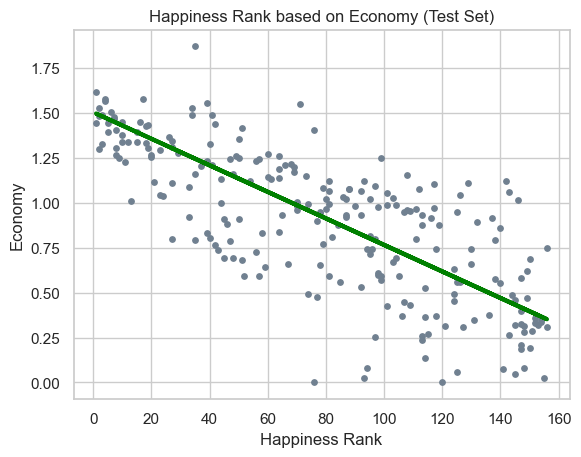

<Figure size 640x480 with 0 Axes>

In [47]:
# Create a plot that shows the regression line from the model on the Economy test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='slategrey', s = 15)
plot_test.plot(X_test, y_predicted, color='green', linewidth =3)
plot_test.title('Happiness Rank based on Economy (Test Set)')
plot_test.xlabel('Happiness Rank')
plot_test.ylabel('Economy')
plot_test.show()
plot_test.savefig('WHRsctplt_hr_economy_testset.png') 

In [48]:
# Create objects that contain the model summary statistics for Health.
# RMSE is the mean squared error

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [49]:
# Print the model summary statistics. Evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print(' ')
print('Mean squared error: ', rmse)
print(' ')
print('R2 score: ', r2)

Slope: [[-0.00738901]]
 
Mean squared error:  0.07479310075098648
 
R2 score:  0.5440495278323988


In [50]:
y_predicted

array([[0.37421136],
       [0.58849257],
       [0.91360889],
       [1.39389436],
       [0.94316491],
       [0.58110356],
       [0.66977165],
       [1.26089223],
       [0.4185454 ],
       [1.15005712],
       [1.26089223],
       [0.43332342],
       [0.4185454 ],
       [0.35943334],
       [0.81755179],
       [1.35694932],
       [1.24611421],
       [0.85449683],
       [0.57371455],
       [1.41606138],
       [1.32739329],
       [0.45549044],
       [0.58110356],
       [1.30522627],
       [1.29044825],
       [0.49982448],
       [0.64760463],
       [0.44810143],
       [1.45300641],
       [1.20916917],
       [0.95794293],
       [1.15744612],
       [0.4111564 ],
       [0.86188584],
       [0.92099789],
       [1.44561741],
       [0.80277378],
       [1.45300641],
       [1.00227697],
       [1.19439116],
       [1.30522627],
       [1.3347823 ],
       [0.56632555],
       [0.66238264],
       [1.4382284 ],
       [0.65499363],
       [0.8249408 ],
       [0.839

#### C. Training Set Regression Fit

In [51]:
# Predict X_train

y_predicted_train = regression.predict(X_train)

In [52]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [53]:
# Print the model summary statistics to evaluate the performance of the training model.

print('Slope:', regression.coef_)
print(' ')
print('Mean squared error: ', rmse)
print(' ')
print('R2 score: ', r2)

Slope: [[-0.00738901]]
 
Mean squared error:  0.05565759334907756
 
R2 score:  0.6644882593137631


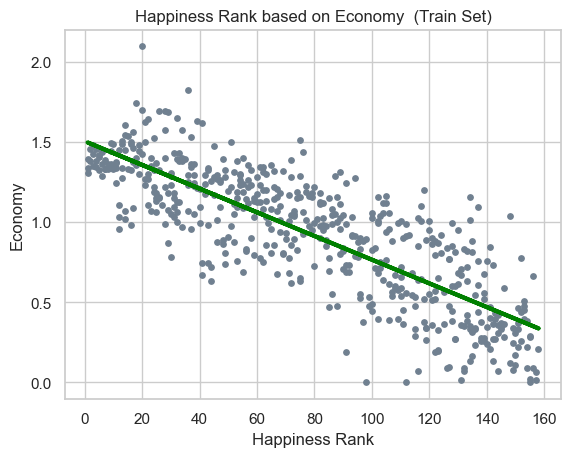

<Figure size 640x480 with 0 Axes>

In [54]:
# Visualizing the training set results of Economy.

plot_test = plt
plot_test.scatter(X_train, y_train, color='slategrey', s = 15)
plot_test.plot(X_train, y_predicted_train, color='green', linewidth =3)
plot_test.title('Happiness Rank based on Economy  (Train Set)')
plot_test.xlabel('Happiness Rank')
plot_test.ylabel('Economy')
plot_test.show()
plot_test.savefig('WHRsctplt_hr_economy_trainset.png') 

In [55]:
dataecon1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
dataecon1.head(20)

Actual  Predicted
0   0.3198   0.374211
1   0.4541   0.588493
2   0.9650   0.913609
3   1.3945   1.393894
4   1.4050   0.943165
5   0.0566   0.581104
6   0.2560   0.669772
7   1.0893   1.260892
8   0.3230   0.418545
9   1.1620   1.150057
10  0.9186   1.260892
11  0.4604   0.433323
12  0.5794   0.418545
13  0.0260   0.359433
14  1.1227   0.817552
15  1.2690   1.356949
16  0.7940   1.246114
17  1.0750   0.854497
18  1.0430   0.573715
19  1.3410   1.416061

##### Slope is negative which indicates a negative relationship. The mean is minimal therefore the regression line passes fairly close to the observations.  The model so far is a suitable.The r-squared value is 54%, economy contributes to the happiness rank but other factors play apart.  I would classify this as a moderate predictor.  

### Health

##### Scatterplot

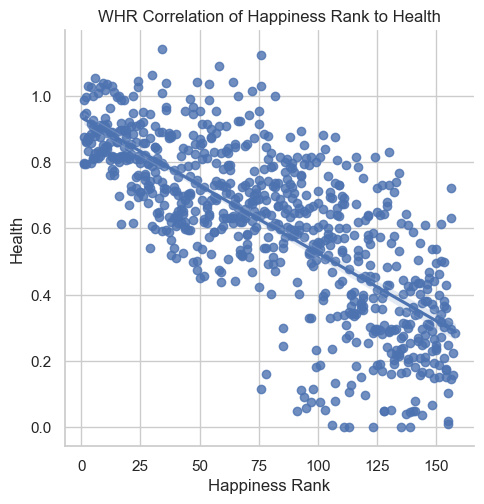

In [56]:
# Scatterplot relationship between Happiness Rank and Health

scatter_WHRE1 = sns.lmplot(x = 'Happiness Rank', y = 'Health', data = WHR_ALLYEARS)
plt.title('WHR Correlation of Happiness Rank to Health')
plt.savefig('sctplt_hr_health.png') 
plt.savefig('WHRsctplt_hr_health.png') 

In [57]:
# Reshape the Economy variable into NumPy arrays and put them into separate objects.

X = WHR_ALLYEARS['Happiness Rank'].values.reshape(-1,1)
y = WHR_ALLYEARS['Health'].values.reshape(-1,1)

In [58]:
# Display the Happiness Rank values

X

array([[  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
       [ 71],
       [ 72],
      

In [59]:
# Display the Health values

y

array([[0.9414],
       [0.9478],
       [0.8746],
       [0.8852],
       [0.9056],
       [0.8891],
       [0.8928],
       [0.9109],
       [0.9084],
       [0.9316],
       [0.9139],
       [0.8603],
       [0.8904],
       [0.8144],
       [0.8618],
       [0.697 ],
       [0.9189],
       [0.8953],
       [0.8967],
       [0.8093],
       [0.9094],
       [0.7205],
       [1.0253],
       [0.7966],
       [0.8919],
       [0.8586],
       [0.7973],
       [0.9458],
       [0.7872],
       [0.8448],
       [0.8116],
       [0.6908],
       [0.7385],
       [0.7203],
       [0.9556],
       [0.8872],
       [0.8753],
       [0.7249],
       [0.6082],
       [0.6148],
       [0.6774],
       [0.6443],
       [0.5977],
       [0.789 ],
       [0.9911],
       [0.9654],
       [0.7908],
       [0.7472],
       [0.9545],
       [0.5392],
       [0.6183],
       [0.661 ],
       [0.6437],
       [0.8734],
       [0.7313],
       [0.7431],
       [0.7302],
       [0.7361],
       [0.779 

In [60]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### B. Regression Analysis

In [61]:
# Create a regression object.
# This is the regression object, which will be fit onto the Health training set.

regression = LinearRegression() 

In [62]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [63]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

In [64]:
# Print the model summary statistics. Evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print(' ')
print('Mean squared error: ', rmse)
print(' ')
print('R2 score: ', r2)

Slope: [[-0.00427893]]
 
Mean squared error:  0.05565759334907756
 
R2 score:  0.6644882593137631


In [65]:
# Create objects that contain the model summary statistics for Health.
# RMSE is the mean squared error

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [66]:
# Print the model summary statistics. Evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print(' ')
print('Mean squared error: ', rmse)
print(' ')
print('R2 score: ', r2)

Slope: [[-0.00427893]]
 
Mean squared error:  0.028252521299294793
 
R2 score:  0.4912351918583798


In [67]:
y_predicted

array([[0.29467915],
       [0.41876813],
       [0.60704106],
       [0.88517154],
       [0.62415679],
       [0.4144892 ],
       [0.46583636],
       [0.80815079],
       [0.32035273],
       [0.74396684],
       [0.80815079],
       [0.32891059],
       [0.32035273],
       [0.28612129],
       [0.55141497],
       [0.86377689],
       [0.79959293],
       [0.57280962],
       [0.41021027],
       [0.89800833],
       [0.84666117],
       [0.34174738],
       [0.4144892 ],
       [0.83382437],
       [0.82526651],
       [0.36742096],
       [0.45299957],
       [0.33746845],
       [0.91940298],
       [0.77819828],
       [0.63271465],
       [0.74824577],
       [0.3160738 ],
       [0.57708855],
       [0.61132   ],
       [0.91512405],
       [0.54285711],
       [0.91940298],
       [0.65838823],
       [0.76964042],
       [0.83382437],
       [0.8509401 ],
       [0.40593134],
       [0.46155743],
       [0.91084512],
       [0.4572785 ],
       [0.5556939 ],
       [0.564

#### C. Training Set Regression Fit

In [68]:
# Predict X_train

y_predicted_train = regression.predict(X_train)

In [69]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [70]:
# Print the model summary statistics to evaluate the performance of the training model.

print('Slope:', regression.coef_)
print(' ')
print('Mean squared error: ', rmse)
print(' ')
print('R2 score: ', r2)

Slope: [[-0.00427893]]
 
Mean squared error:  0.02741742665107027
 
R2 score:  0.5741538629150815


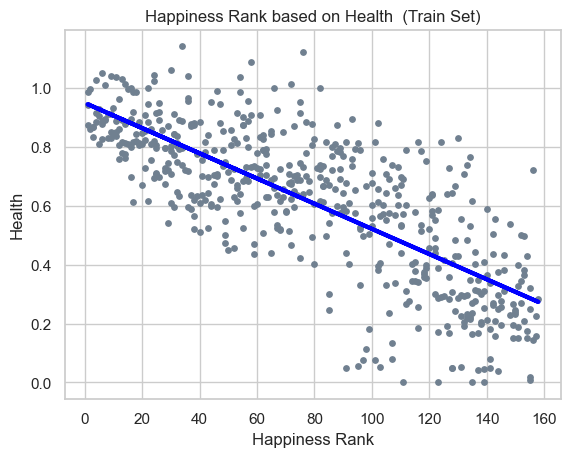

<Figure size 640x480 with 0 Axes>

In [71]:
# Visualizing the training set results of Health.

plot_test = plt
plot_test.scatter(X_train, y_train, color='slategrey', s = 15)
plot_test.plot(X_train, y_predicted_train, color='blue', linewidth =3)
plot_test.title('Happiness Rank based on Health  (Train Set)')
plot_test.xlabel('Happiness Rank')
plot_test.ylabel('Health')
plot_test.show()
plot_test.savefig('WHRsctplt_hr_health_trainset.png') 

In [72]:
datahlth1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
datahlth1.head(20)

Actual  Predicted
0   0.3034   0.294679
1   0.3587   0.418768
2   0.7850   0.607041
3   0.8618   0.885172
4   1.0300   0.624157
5   0.1880   0.414489
6   0.0000   0.465836
7   0.6492   0.808151
8   0.4490   0.320353
9   0.8250   0.743967
10  0.6908   0.808151
11  0.6111   0.328911
12  0.3105   0.320353
13  0.1050   0.286121
14  0.7617   0.551415
15  0.9200   0.863777
16  0.7890   0.799593
17  0.7351   0.572810
18  0.5740   0.410210
19  0.8910   0.898008

##### Slope is negative which indicates a negative relationship. The mean is minimal therefore the regression line passes fairly close to the observations.  The model so far is a suitable. The R2 value is 66%, would consider this a moderate predictor.  

### Family

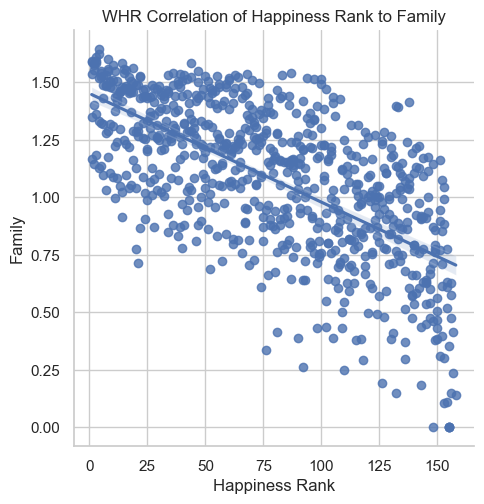

In [73]:
# Scatterplot relationship between Happiness Rank and Family

scatter_WHRE1 = sns.lmplot(x = 'Happiness Rank', y = 'Family', data = WHR_ALLYEARS)
plt.title('WHR Correlation of Happiness Rank to Family')
plt.savefig('sctplt_hr_family.png') 
plt.savefig('WHRsctplt_hr_family.png') 

In [74]:
# Reshape the Economy variable into NumPy arrays and put them into separate objects.

X = WHR_ALLYEARS['Happiness Rank'].values.reshape(-1,1)
y = WHR_ALLYEARS['Family'].values.reshape(-1,1)

In [75]:
# Display the Happiness Rank values

X

array([[  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
       [ 71],
       [ 72],
      

In [76]:
# Display the Family values

y

array([[1.3495],
       [1.4022],
       [1.3606],
       [1.331 ],
       [1.3226],
       [1.3183],
       [1.2802],
       [1.2891],
       [1.3197],
       [1.3092],
       [1.2239],
       [1.2379],
       [1.297 ],
       [0.9145],
       [1.2471],
       [1.2329],
       [1.2196],
       [1.3695],
       [1.2857],
       [1.1258],
       [1.2855],
       [1.256 ],
       [1.02  ],
       [1.1985],
       [1.2994],
       [1.1245],
       [1.0786],
       [1.2604],
       [1.2482],
       [1.2064],
       [1.2089],
       [1.2402],
       [1.265 ],
       [1.0839],
       [1.3138],
       [1.302 ],
       [1.0762],
       [1.1659],
       [0.972 ],
       [1.1835],
       [1.0251],
       [1.0436],
       [1.3404],
       [1.27  ],
       [1.2571],
       [0.9577],
       [0.999 ],
       [1.2162],
       [1.1978],
       [0.9784],
       [1.0153],
       [1.3048],
       [1.1224],
       [1.2739],
       [1.2575],
       [1.1418],
       [0.9746],
       [1.2329],
       [1.2795

In [77]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### B. Regression Analysis

In [78]:
# Create a regression object.
# This is the regression object, which will be fit onto the Family training set.

regression = LinearRegression() 

In [79]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [80]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

In [81]:
# Print the model summary statistics. Evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print(' ')
print('Mean squared error: ', rmse)
print(' ')
print('R2 score: ', r2)

Slope: [[-0.00470206]]
 
Mean squared error:  0.02741742665107027
 
R2 score:  0.5741538629150815


In [82]:
# Create objects that contain the model summary statistics for Health.
# RMSE is the mean squared error

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [83]:
# Print the model summary statistics. Evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print(' ')
print('Mean squared error: ', rmse)
print(' ')
print('R2 score: ', r2)

Slope: [[-0.00470206]]
 
Mean squared error:  0.06495277330405905
 
R2 score:  0.4151756000693315


In [84]:
y_predicted

array([[0.73823904],
       [0.87459875],
       [1.08148934],
       [1.38712316],
       [1.10029757],
       [0.86989669],
       [0.9263214 ],
       [1.3024861 ],
       [0.7664514 ],
       [1.23195522],
       [1.3024861 ],
       [0.77585551],
       [0.7664514 ],
       [0.72883492],
       [1.02036257],
       [1.36361287],
       [1.29308198],
       [1.04387287],
       [0.86519463],
       [1.40122934],
       [1.34480463],
       [0.78996169],
       [0.86989669],
       [1.33069845],
       [1.32129434],
       [0.81817404],
       [0.91221522],
       [0.78525963],
       [1.42473963],
       [1.26957169],
       [1.10970169],
       [1.23665728],
       [0.76174934],
       [1.04857492],
       [1.0861914 ],
       [1.42003757],
       [1.01095845],
       [1.42473963],
       [1.13791404],
       [1.26016757],
       [1.33069845],
       [1.34950669],
       [0.86049257],
       [0.92161934],
       [1.41533551],
       [0.91691728],
       [1.02506463],
       [1.034

#### C. Training Set Regression Fit

In [85]:
# Predict X_train

y_predicted_train = regression.predict(X_train)

In [86]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [87]:
# Print the model summary statistics to evaluate the performance of the training model.

print('Slope:', regression.coef_)
print(' ')
print('Mean squared error: ', rmse)
print(' ')
print('R2 score: ', r2)

Slope: [[-0.00470206]]
 
Mean squared error:  0.06283192882518486
 
R2 score:  0.4153551969850957


In [88]:
# Visualizing the training set results of Family.

plot_test = plt
plot_test.scatter(X_train, y_train, color='slategrey', s = 15)
plot_test.plot(X_train, y_predicted_train, color='purple', linewidth =3)
plot_test.title('Happiness Rank based on Family  (Train Set)')
plot_test.xlabel('Happiness Rank')
plot_test.ylabel('Family')
plot_test.show()
plot_test.savefig('WHRsctplt_hr_family_trainset.png') 

<Figure size 640x480 with 0 Axes>

In [89]:
datafmly1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
datafmly1.head(20)

Actual  Predicted
0   0.3029   0.738239
1   0.8691   0.874599
2   1.1790   1.081489
3   1.2471   1.387123
4   1.2900   1.100298
5   0.8068   0.869897
6   0.8130   0.926321
7   1.0448   1.302486
8   0.6880   0.766451
9   1.2320   1.231955
10  1.2402   1.302486
11  0.6274   0.775856
12  0.4749   0.766451
13  0.0000   0.728835
14  0.6418   1.020363
15  1.4870   1.363613
16  1.2420   1.293082
17  1.1296   1.043873
18  0.9800   0.865195
19  1.5040   1.401229

##### Slope is negative which indicates a negative relationship. The mean is minimal therefore the regression line passes fairly close to the observations.  The model so far is a suitable.The r-squared value is 57%, family contributes to the happiness rank but other factors play apart.  

## Happiness Score Correlation 

### Economy

####  A. Data Prep for Regression of Variables

##### Scatterplot

In [90]:
# Scatterplot relationship between Happiness Score and Economy

scatter_WHRE = sns.lmplot(x = 'Happiness Score', y = 'Economy', data = WHR_ALLYEARS)
plt.title('WHR Correlation of Happiness Score to Economy')
plt.savefig('sctplt_hs_economy.png') 
plt.savefig('WHRsctplt_hs_economy.png') 

In [91]:
# Reshape the Economy variable into NumPy arrays and put them into separate objects.

X = WHR_ALLYEARS['Happiness Score'].values.reshape(-1,1)
y = WHR_ALLYEARS['Economy'].values.reshape(-1,1)

In [92]:
# Display the Happiness Score values

X

array([[7.587],
       [7.561],
       [7.527],
       [7.522],
       [7.427],
       [7.406],
       [7.378],
       [7.364],
       [7.286],
       [7.284],
       [7.278],
       [7.226],
       [7.2  ],
       [7.187],
       [7.119],
       [6.983],
       [6.946],
       [6.94 ],
       [6.937],
       [6.901],
       [6.867],
       [6.81 ],
       [6.798],
       [6.786],
       [6.75 ],
       [6.67 ],
       [6.611],
       [6.575],
       [6.574],
       [6.505],
       [6.485],
       [6.477],
       [6.455],
       [6.411],
       [6.329],
       [6.302],
       [6.298],
       [6.295],
       [6.269],
       [6.168],
       [6.13 ],
       [6.123],
       [6.003],
       [5.995],
       [5.987],
       [5.984],
       [5.975],
       [5.96 ],
       [5.948],
       [5.89 ],
       [5.889],
       [5.878],
       [5.855],
       [5.848],
       [5.833],
       [5.828],
       [5.824],
       [5.813],
       [5.791],
       [5.77 ],
       [5.759],
       [5.754],
       [

In [93]:
# Display the Economy values

y

array([[1.3965],
       [1.3023],
       [1.3255],
       [1.459 ],
       [1.3263],
       [1.2903],
       [1.3294],
       [1.3317],
       [1.2502],
       [1.3336],
       [1.2286],
       [0.9558],
       [1.3372],
       [1.0205],
       [1.3945],
       [0.9812],
       [1.5639],
       [1.336 ],
       [1.3078],
       [1.4273],
       [1.2664],
       [1.0442],
       [1.5219],
       [1.0635],
       [1.3279],
       [1.1072],
       [1.6904],
       [1.2778],
       [1.0535],
       [1.179 ],
       [1.0617],
       [0.9186],
       [0.9669],
       [1.3954],
       [1.2301],
       [1.2074],
       [1.291 ],
       [1.5542],
       [0.9953],
       [1.2118],
       [0.7645],
       [0.7455],
       [0.6324],
       [1.1689],
       [1.2707],
       [1.2446],
       [0.864 ],
       [1.3238],
       [1.2511],
       [0.6813],
       [0.5945],
       [0.7599],
       [1.1225],
       [1.185 ],
       [1.1472],
       [0.5933],
       [0.9002],
       [1.0319],
       [1.1256

In [94]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### B. Regression Analysis

In [95]:
# Create a regression object.
# This is the regression object, which will be fit onto the Economy training set.

regression = LinearRegression()  

In [96]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [97]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

In [98]:
# Create a plot that shows the regression line from the model on the Economy test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='green', linewidth =3)
plot_test.title('Happiness Score based on Economy (Test Set)')
plot_test.xlabel('Happiness Score ')
plot_test.ylabel('Economy')
plot_test.show()
plot_test.savefig('WHRsctplt_hs_economy_testset.png') 

<Figure size 640x480 with 0 Axes>

In [99]:
# Create objects that contain the model summary statistics for Health.
# RMSE is the mean squared error

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [100]:
# Print the model summary statistics. Evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print(' ')
print('Mean squared error: ', rmse)
print(' ')
print('R2 score: ', r2)

Slope: [[0.29476256]]
 
Mean squared error:  0.07473481105253181
 
R2 score:  0.5444048709758981


In [101]:
y_predicted

array([[0.39185719],
       [0.64564776],
       [0.91741884],
       [1.43649571],
       [0.93864174],
       [0.5973067 ],
       [0.6854407 ],
       [1.24637386],
       [0.39834197],
       [1.12728978],
       [1.24725815],
       [0.46377926],
       [0.43577681],
       [0.24683401],
       [0.84991821],
       [1.35779411],
       [1.18123133],
       [0.87821542],
       [0.64594252],
       [1.44239096],
       [1.25050053],
       [0.44815684],
       [0.65154301],
       [1.23517288],
       [1.27614488],
       [0.5586928 ],
       [0.65596445],
       [0.45051494],
       [1.50134347],
       [1.15588175],
       [0.94954796],
       [1.09810829],
       [0.39392053],
       [0.84814964],
       [0.89236402],
       [1.49191107],
       [0.83606437],
       [1.49456394],
       [0.97696088],
       [1.14497554],
       [1.23340431],
       [1.2507953 ],
       [0.62029818],
       [0.67777688],
       [1.48572106],
       [0.69693644],
       [0.85050774],
       [0.865

#### C. Training Set Regression Fit

In [102]:
# Predict X_train

y_predicted_train = regression.predict(X_train)

In [103]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [104]:
# Print the model summary statistics to evaluate the performance of the training model.

print('Slope:', regression.coef_)
print(' ')
print('Mean squared error: ', rmse)
print(' ')
print('R2 score: ', r2)

Slope: [[0.29476256]]
 
Mean squared error:  0.05770090905862739
 
R2 score:  0.6521708670366146


In [105]:
# Visualizing the training set results of Economy.

plot_test = plt
plot_test.scatter(X_train, y_train, color='silver', s = 15)
plot_test.plot(X_train, y_predicted_train, color='green', linewidth =3)
plot_test.title('Happiness Score based on Economy  (Train Set)')
plot_test.xlabel('Happiness Score')
plot_test.ylabel('Economy')
plot_test.show()
plot_test.savefig('WHRsctplt_hs_economy_trainset.png') 

<Figure size 640x480 with 0 Axes>

In [106]:
dataecon = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
dataecon.head(20)

Actual  Predicted
0   0.3198   0.391857
1   0.4541   0.645648
2   0.9650   0.917419
3   1.3945   1.436496
4   1.4050   0.938642
5   0.0566   0.597307
6   0.2560   0.685441
7   1.0893   1.246374
8   0.3230   0.398342
9   1.1620   1.127290
10  0.9186   1.247258
11  0.4604   0.463779
12  0.5794   0.435777
13  0.0260   0.246834
14  1.1227   0.849918
15  1.2690   1.357794
16  0.7940   1.181231
17  1.0750   0.878215
18  1.0430   0.645943
19  1.3410   1.442391

##### Slope: positive slope is a positive relationship. Mean: The mean is minimal therefore the regression line passes fairly close to the observations.  The model so far is a suitable. The r-squared values of the test and training models are similar.  The R2 value suggest the model is not best for making predictions

### Health 

####  A. Data Prep for Regression of Variables

##### Scatterplot

In [107]:
# Scatterplot relationship between Happiness Score and Health

scatter_WHRH = sns.lmplot(x = 'Happiness Score', y = 'Health', data = WHR_ALLYEARS)
plt.title('WHR Correlation of Happiness Score to Health')
plt.savefig('WHRsctplt_hs_health.png')

In [108]:
# Reshape the Health variable into NumPy arrays and put them into separate objects.

X = WHR_ALLYEARS['Happiness Score'].values.reshape(-1,1)
y = WHR_ALLYEARS['Health'].values.reshape(-1,1)

In [109]:
# Display the Happiness Score values

X

array([[7.587],
       [7.561],
       [7.527],
       [7.522],
       [7.427],
       [7.406],
       [7.378],
       [7.364],
       [7.286],
       [7.284],
       [7.278],
       [7.226],
       [7.2  ],
       [7.187],
       [7.119],
       [6.983],
       [6.946],
       [6.94 ],
       [6.937],
       [6.901],
       [6.867],
       [6.81 ],
       [6.798],
       [6.786],
       [6.75 ],
       [6.67 ],
       [6.611],
       [6.575],
       [6.574],
       [6.505],
       [6.485],
       [6.477],
       [6.455],
       [6.411],
       [6.329],
       [6.302],
       [6.298],
       [6.295],
       [6.269],
       [6.168],
       [6.13 ],
       [6.123],
       [6.003],
       [5.995],
       [5.987],
       [5.984],
       [5.975],
       [5.96 ],
       [5.948],
       [5.89 ],
       [5.889],
       [5.878],
       [5.855],
       [5.848],
       [5.833],
       [5.828],
       [5.824],
       [5.813],
       [5.791],
       [5.77 ],
       [5.759],
       [5.754],
       [

In [110]:
# Display the Health values

y

array([[0.9414],
       [0.9478],
       [0.8746],
       [0.8852],
       [0.9056],
       [0.8891],
       [0.8928],
       [0.9109],
       [0.9084],
       [0.9316],
       [0.9139],
       [0.8603],
       [0.8904],
       [0.8144],
       [0.8618],
       [0.697 ],
       [0.9189],
       [0.8953],
       [0.8967],
       [0.8093],
       [0.9094],
       [0.7205],
       [1.0253],
       [0.7966],
       [0.8919],
       [0.8586],
       [0.7973],
       [0.9458],
       [0.7872],
       [0.8448],
       [0.8116],
       [0.6908],
       [0.7385],
       [0.7203],
       [0.9556],
       [0.8872],
       [0.8753],
       [0.7249],
       [0.6082],
       [0.6148],
       [0.6774],
       [0.6443],
       [0.5977],
       [0.789 ],
       [0.9911],
       [0.9654],
       [0.7908],
       [0.7472],
       [0.9545],
       [0.5392],
       [0.6183],
       [0.661 ],
       [0.6437],
       [0.8734],
       [0.7313],
       [0.7431],
       [0.7302],
       [0.7361],
       [0.779 

In [111]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [112]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

#### B. Regression Analysis

In [113]:
## Create a regression object
# This is the regression object, which will be fit onto the Health training set

regression = LinearRegression()

In [114]:
# Fit the regression object onto the Health training set.

regression.fit(X_train, y_train)

LinearRegression()

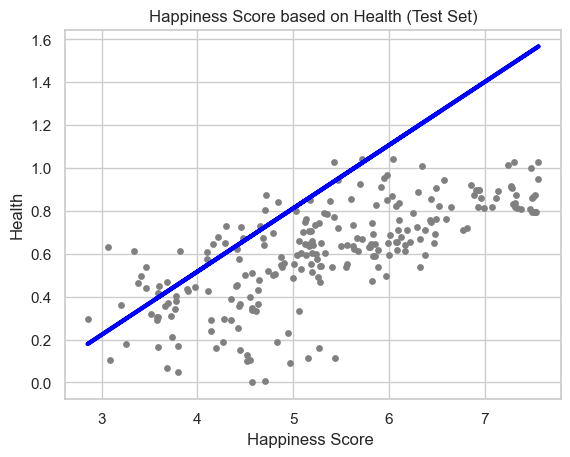

<Figure size 640x480 with 0 Axes>

In [115]:
# Create a plot that shows the regression line from the model on the Health test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='blue', linewidth =3)
plot_test.title('Happiness Score based on Health (Test Set)')
plot_test.xlabel('Happiness Score ')
plot_test.ylabel('Health')
plot_test.show()
plot_test.savefig('WHRsctplt_hs_health_testset.png') 

In [116]:
# Create objects that contain the model summary statistics for Economy.
# RMSE is the mean squared error

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [117]:
# Print the model summary statistics. Evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print(' ')
print('Mean squared error: ', rmse)
print(' ')
print('R2 score: ', r2)

Slope: [[0.1720393]]
 
Mean squared error:  0.15303930545395755
 
R2 score:  -1.7558960863203739


In [118]:
y_predicted

array([[0.39185719],
       [0.64564776],
       [0.91741884],
       [1.43649571],
       [0.93864174],
       [0.5973067 ],
       [0.6854407 ],
       [1.24637386],
       [0.39834197],
       [1.12728978],
       [1.24725815],
       [0.46377926],
       [0.43577681],
       [0.24683401],
       [0.84991821],
       [1.35779411],
       [1.18123133],
       [0.87821542],
       [0.64594252],
       [1.44239096],
       [1.25050053],
       [0.44815684],
       [0.65154301],
       [1.23517288],
       [1.27614488],
       [0.5586928 ],
       [0.65596445],
       [0.45051494],
       [1.50134347],
       [1.15588175],
       [0.94954796],
       [1.09810829],
       [0.39392053],
       [0.84814964],
       [0.89236402],
       [1.49191107],
       [0.83606437],
       [1.49456394],
       [0.97696088],
       [1.14497554],
       [1.23340431],
       [1.2507953 ],
       [0.62029818],
       [0.67777688],
       [1.48572106],
       [0.69693644],
       [0.85050774],
       [0.865

#### C. Training Set Regression Fit

In [119]:
# Predict X_train

y_predicted_train = regression.predict(X_train)

In [120]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [121]:
# Print the model summary statistics to evaluate the performance of the training model.

print('Slope:', regression.coef_)
print(' ')
print('Mean squared error: ', rmse)
print(' ')
print('R2 score: ', r2)

Slope: [[0.1720393]]
 
Mean squared error:  0.02752905858608712
 
R2 score:  0.572420001130486


In [122]:
# Visualizing the training set results of Family.

plot_test = plt
plot_test.scatter(X_train, y_train, color='silver', s = 15)
plot_test.plot(X_train, y_predicted_train, color='blue', linewidth =3)
plot_test.title('Happiness Score based on Health (Train Set)')
plot_test.xlabel('Happiness Score')
plot_test.ylabel('Health')
plot_test.show()
plot_test.savefig('WHRsctplt_hs_health_trainset.png') 

<Figure size 640x480 with 0 Axes>

In [123]:
datahlth = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
datahlth.head(20)

Actual  Predicted
0   0.3034   0.391857
1   0.3587   0.645648
2   0.7850   0.917419
3   0.8618   1.436496
4   1.0300   0.938642
5   0.1880   0.597307
6   0.0000   0.685441
7   0.6492   1.246374
8   0.4490   0.398342
9   0.8250   1.127290
10  0.6908   1.247258
11  0.6111   0.463779
12  0.3105   0.435777
13  0.1050   0.246834
14  0.7617   0.849918
15  0.9200   1.357794
16  0.7890   1.181231
17  0.7351   0.878215
18  0.5740   0.645943
19  0.8910   1.442391

##### Slope: positive slope is a positive relationship. Mean: The mean is minimal therefore the regression line passes fairly close to the observations.  The model so far is a suitable. R2: The R2 value is a negative value therefore is not a good fit at all and will not be best to make predictions.  

### Family

####  A. Data Prep for Regression of Variables

##### Scatterplot

In [124]:
# Scatterplot relationship between Happiness Score and Family

scatter_WHRF = sns.lmplot(x = 'Happiness Score', y = 'Family', data = WHR_ALLYEARS)
plt.title('WHR Correlation of Happiness Score to Family')
plt.savefig('WHRsctplt_hs_family.png')

In [125]:
# Reshape the Family variable into NumPy arrays and put them into separate objects.

X = WHR_ALLYEARS['Happiness Score'].values.reshape(-1,1)
y = WHR_ALLYEARS['Family'].values.reshape(-1,1)

In [126]:
# Display the Happiness Score values

X

array([[7.587],
       [7.561],
       [7.527],
       [7.522],
       [7.427],
       [7.406],
       [7.378],
       [7.364],
       [7.286],
       [7.284],
       [7.278],
       [7.226],
       [7.2  ],
       [7.187],
       [7.119],
       [6.983],
       [6.946],
       [6.94 ],
       [6.937],
       [6.901],
       [6.867],
       [6.81 ],
       [6.798],
       [6.786],
       [6.75 ],
       [6.67 ],
       [6.611],
       [6.575],
       [6.574],
       [6.505],
       [6.485],
       [6.477],
       [6.455],
       [6.411],
       [6.329],
       [6.302],
       [6.298],
       [6.295],
       [6.269],
       [6.168],
       [6.13 ],
       [6.123],
       [6.003],
       [5.995],
       [5.987],
       [5.984],
       [5.975],
       [5.96 ],
       [5.948],
       [5.89 ],
       [5.889],
       [5.878],
       [5.855],
       [5.848],
       [5.833],
       [5.828],
       [5.824],
       [5.813],
       [5.791],
       [5.77 ],
       [5.759],
       [5.754],
       [

In [127]:
# Display the Family values

y

array([[1.3495],
       [1.4022],
       [1.3606],
       [1.331 ],
       [1.3226],
       [1.3183],
       [1.2802],
       [1.2891],
       [1.3197],
       [1.3092],
       [1.2239],
       [1.2379],
       [1.297 ],
       [0.9145],
       [1.2471],
       [1.2329],
       [1.2196],
       [1.3695],
       [1.2857],
       [1.1258],
       [1.2855],
       [1.256 ],
       [1.02  ],
       [1.1985],
       [1.2994],
       [1.1245],
       [1.0786],
       [1.2604],
       [1.2482],
       [1.2064],
       [1.2089],
       [1.2402],
       [1.265 ],
       [1.0839],
       [1.3138],
       [1.302 ],
       [1.0762],
       [1.1659],
       [0.972 ],
       [1.1835],
       [1.0251],
       [1.0436],
       [1.3404],
       [1.27  ],
       [1.2571],
       [0.9577],
       [0.999 ],
       [1.2162],
       [1.1978],
       [0.9784],
       [1.0153],
       [1.3048],
       [1.1224],
       [1.2739],
       [1.2575],
       [1.1418],
       [0.9746],
       [1.2329],
       [1.2795

In [128]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### B. Regression Analysis

In [129]:
## Create a regression object
# This is the regression object, which will be fit onto the Family training set

regression = LinearRegression()

In [130]:
# Fit the regression object onto the Family training set.

regression.fit(X_train, y_train)

LinearRegression()

In [131]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

In [132]:
# Create a plot that shows the regression line from the model on the Family test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='purple', linewidth =3)
plot_test.title('Happiness Score based on Family (Test Set)')
plot_test.xlabel('Happiness Score ')
plot_test.ylabel('Family')
plot_test.show()
plot_test.savefig('WHRsctplt_hs_family_testset.png') 

<Figure size 640x480 with 0 Axes>

In [133]:
# Create objects that contain the model summary statistics for Family.
# RMSE is the mean squared error

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [134]:
# Print the model summary statistics. Evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print(' ')
print('Mean squared error: ', rmse)
print(' ')
print('R2 score: ', r2)

Slope: [[0.19023383]]
 
Mean squared error:  0.06396092897123601
 
R2 score:  0.4241060080759689


In [135]:
y_predicted

array([[0.74466049],
       [0.90845182],
       [1.08384742],
       [1.4188492 ],
       [1.09754426],
       [0.87725348],
       [0.93413339],
       [1.29614838],
       [0.74884564],
       [1.21929391],
       [1.29671908],
       [0.79107755],
       [0.77300534],
       [0.65106545],
       [1.04028387],
       [1.36805677],
       [1.2541067 ],
       [1.05854632],
       [0.90864206],
       [1.42265388],
       [1.29881165],
       [0.78099516],
       [0.9122565 ],
       [1.28891949],
       [1.31536199],
       [0.85233284],
       [0.91511001],
       [0.78251703],
       [1.46070064],
       [1.23774659],
       [1.10458291],
       [1.20046076],
       [0.74599213],
       [1.03914247],
       [1.06767754],
       [1.45461316],
       [1.03134288],
       [1.45632527],
       [1.12227465],
       [1.23070794],
       [1.28777809],
       [1.29900189],
       [0.89209172],
       [0.92918731],
       [1.45061825],
       [0.94155251],
       [1.04066434],
       [1.050

#### C. Training Set Regression Fit

In [136]:
# Predict X_train

y_predicted_train = regression.predict(X_train)

In [137]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [138]:
# Print the model summary statistics to evaluate the performance of the training model.

print('Slope:', regression.coef_)
print(' ')
print('Mean squared error: ', rmse)
print(' ')
print('R2 score: ', r2)

Slope: [[0.19023383]]
 
Mean squared error:  0.06240841449977122
 
R2 score:  0.41929595535405095


In [139]:
# Visualizing the training set results of Family.

plot_test = plt
plot_test.scatter(X_train, y_train, color='silver', s = 15)
plot_test.plot(X_train, y_predicted_train, color='purple', linewidth =3)
plot_test.title('Happiness Score based on Family (Train Set)')
plot_test.xlabel('Happiness Score')
plot_test.ylabel('Family')
plot_test.show()
plot_test.savefig('WHRsctplt_hs_family_trainset.png') 

<Figure size 640x480 with 0 Axes>

In [140]:
datafmly = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
datafmly.head(20)

Actual  Predicted
0   0.3029   0.744660
1   0.8691   0.908452
2   1.1790   1.083847
3   1.2471   1.418849
4   1.2900   1.097544
5   0.8068   0.877253
6   0.8130   0.934133
7   1.0448   1.296148
8   0.6880   0.748846
9   1.2320   1.219294
10  1.2402   1.296719
11  0.6274   0.791078
12  0.4749   0.773005
13  0.0000   0.651065
14  0.6418   1.040284
15  1.4870   1.368057
16  1.2420   1.254107
17  1.1296   1.058546
18  0.9800   0.908642
19  1.5040   1.422654

#### Slope: positive slope is a positive relationship. Mean: The mean is minimal therefore the regression line passes fairly close to the observations.  The model so far is a suitable. The R2 value is 0.424 showing the model is not the best fit. 

# 06. Exporting Dataframes

In [141]:
# Exporting merged data as pickel format
## WHR_ALLYEAR 

WHR_ALLYEARS.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'WHR_ALLYEARS.pkl'))
                      
# Exporting single dataframes
                        
WHRC_2015.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'WHRC_2015.csv'))
WHRC_2016.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'WHRC_2016.csv'))
WHRC_2017.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'WHRC_2017.csv'))
WHRC_2018.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'WHRC_2018.csv'))
WHRC_2019.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'WHRC_2019.csv')) 